# Create Feature Interactions

In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt

In [3]:
import pandas as pd

# Load Numeric Data

In [4]:
# We have to use float for now because int cannot accept NaN
num_data = pd.read_csv('./data/numeric_features.csv', low_memory=False, dtype=float)
print num_data.columns
num_data = num_data.drop('Unnamed: 0', axis=1)
num_data['id'] = num_data['id'].astype(int).astype("category")

num_data = num_data.drop('host_total_listings_count', axis=1)

print num_data.shape
num_data.sample()

Index([u'Unnamed: 0', u'id', u'bathrooms', u'bedrooms', u'beds',
       u'cleaning_fee', u'guests_included', u'host_listings_count',
       u'host_total_listings_count', u'host_acceptance_rate',
       u'host_response_rate'],
      dtype='object')
(243721, 9)


,id,bathrooms,bedrooms,beds,cleaning_fee,guests_included,host_listings_count,host_acceptance_rate,host_response_rate
167993,23540,1.0,2.0,4.0,100.0,4.0,1.0,NaN,1.0


# Load Bool Data

In [5]:
bool_data = pd.read_csv('./data/bool_features.csv', low_memory=False, dtype=int)
print bool_data.columns

bool_data = bool_data.drop('Unnamed: 0', axis=1)
bool_data['id'] = bool_data['id'].astype(int).astype("category")

bool_data.host_has_profile_pic = bool_data.host_has_profile_pic.astype(bool)
bool_data.host_identity_verified = bool_data.host_identity_verified.astype(bool)

print bool_data.shape


Index([u'Unnamed: 0', u'id', u'host_has_profile_pic',
       u'host_identity_verified'],
      dtype='object')
(243721, 3)


# Load Date Data

In [6]:
parse_dates = ['host_since', 'last_scraped', 'days_delta']
date_data = pd.read_csv('./data/date_features.csv', low_memory=False, parse_dates=parse_dates)
print date_data.columns


date_data = date_data.drop('Unnamed: 0', axis=1)
date_data['id'] = date_data['id'].astype(int).astype("category")
date_data.days_delta = date_data.days_delta.apply(lambda x: x.split(' ')[0]).astype(float)

print date_data.shape
date_data.sample()

Index([u'Unnamed: 0', u'id', u'host_since', u'last_scraped', u'days_delta'], dtype='object')
(243721, 4)


,id,host_since,last_scraped,days_delta
187450,7528564,2015-02-28,2015-11-02,247.0


# Load Reviews Data (Dependent variable)

In [7]:
reviews_data = pd.read_csv('./data/reviews_features.csv', low_memory=False, dtype=float)
print reviews_data.columns

reviews_data = reviews_data.drop('Unnamed: 0', axis=1)
reviews_data['id'] = reviews_data['id'].astype(int).astype("category")
print reviews_data.shape
reviews_data.sample()

Index([u'Unnamed: 0', u'id', u'number_of_reviews', u'review_scores_rating',
       u'review_scores_value', u'reviews_per_month'],
      dtype='object')
(243721, 5)


,id,number_of_reviews,review_scores_rating,review_scores_value,reviews_per_month
233550,14136246,5.0,75.0,7.0,1.27


In [8]:
# Generate random indexes for our sample
import numpy as np

np.random.seed(1234)
sample_size=10000
idxs = np.random.randint(0, num_data.shape[0], sample_size)
idxs

array([224047, 189139, 165158, ..., 149821, 130353, 163357])

# Select Dependent Variable

Also, let's drop missing values from our dependent variable.
And let's drop the Id column.

In [9]:
# Set the dependent variable 
dependent_variable = 'review_scores_rating'

# Select the independent variables and get a combined dataset
data = pd.concat([num_data.loc[idxs], 
                  bool_data.loc[idxs][['host_has_profile_pic', 'host_identity_verified']], 
                  date_data.loc[idxs][['days_delta']], 
                  reviews_data.loc[idxs][['reviews_per_month', dependent_variable]]], axis=1)

# Drop Id column for now
data = data.drop('id', axis=1)

print data.shape
print data.columns

# Drop missing values from depedent variable
data = data.dropna(subset=[dependent_variable])


data.sample(1)

(10000, 13)
Index([u'bathrooms', u'bedrooms', u'beds', u'cleaning_fee', u'guests_included',
       u'host_listings_count', u'host_acceptance_rate', u'host_response_rate',
       u'host_has_profile_pic', u'host_identity_verified', u'days_delta',
       u'reviews_per_month', u'review_scores_rating'],
      dtype='object')


,bathrooms,bedrooms,beds,cleaning_fee,guests_included,host_listings_count,host_acceptance_rate,host_response_rate,host_has_profile_pic,host_identity_verified,days_delta,reviews_per_month,review_scores_rating
193897,1.5,1.0,1.0,45.0,1.0,2.0,NaN,1.0,True,True,1498.0,2.37,91.0


# Histogram of each dependent variable

bathrooms


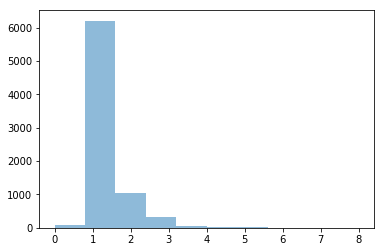

bedrooms


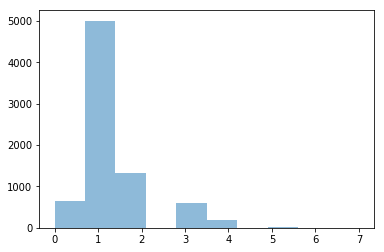

beds


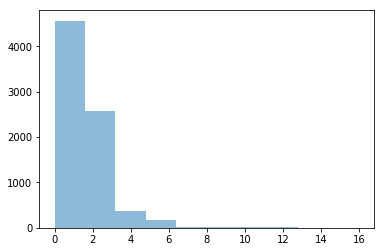

cleaning_fee


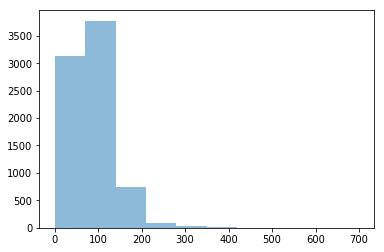

guests_included


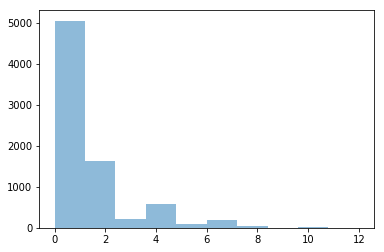

host_listings_count


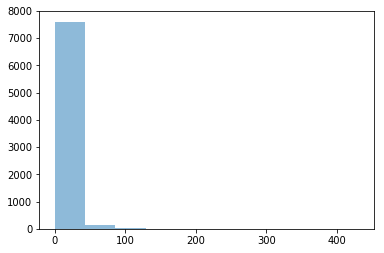

host_acceptance_rate


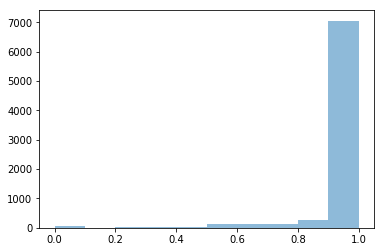

host_response_rate


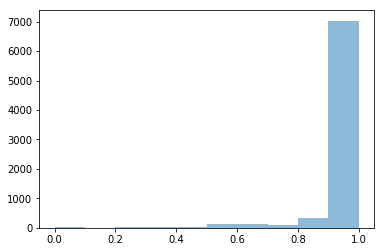

host_has_profile_pic


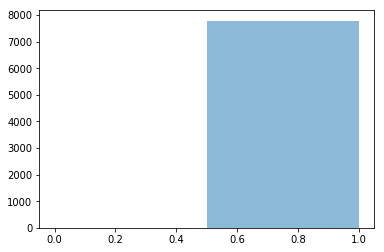

host_identity_verified


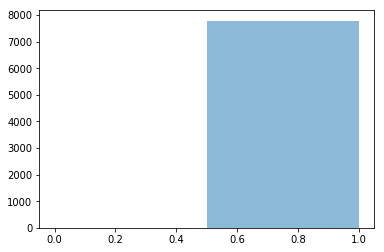

days_delta


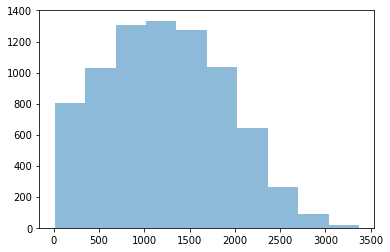

reviews_per_month


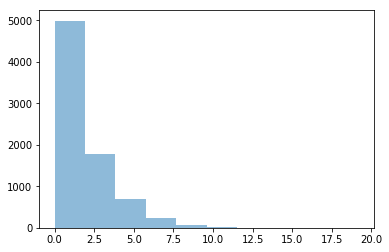

review_scores_rating


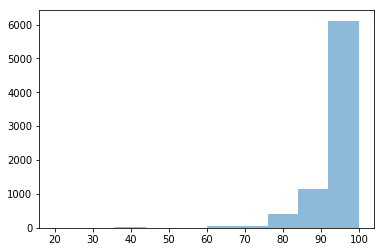

In [10]:
import matplotlib.pyplot as plt
for c in data.columns:
    if 'id' != c:
        print c
        lst = list(data[c].fillna(data[c].median()))
        
        b = 10
        if data[c].dtype == 'bool':
            b = 2
        plt.hist(lst, bins=b, alpha=0.5)
        plt.show()

(array([ 223.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        7570.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

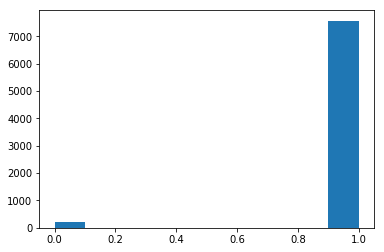

In [11]:
plt.hist(data['host_listings_count'] < 100)

# Scatter plot independent variable by each dependent variable

# Takeaways
1. Remove 'bathrooms' >= 5
2. Remove 'bedrooms' > 5
3. Remove 'beds' >= 8
4. Remove 'cleaning_fee' >= 400
5. Remove 'guests_included' > 8
6. Remove 'host_listings_count' > 100
7. Remove 'host_acceptance_rate' == 0.
8. Remove 'host_response_rate' == 0.
9. Remove 'reviews_per_month' > 12.
10. Drop 'host_has_profile_pic'
11. Drop 'host_identity_verified'

# Split data into Train and Test sets

Before preprocessing data, we need split it into Train and Test sets. Once split, we will impute missing values using Median. And finally, we will drop the outliers as mentioned in the Takeaways section. This sequence is important because we have a ton of missing values, and we'd be left with a tiny dataset if we dropped outliers before imputing missing values.

In [12]:
from sklearn.model_selection import train_test_split

Train, Test = train_test_split(data, test_size=0.33, random_state=1234)

print Train.shape
print Test.shape

(5221, 13)
(2572, 13)


# Impute missing values for Train and Test sets
We will use Median for imputing missing values because it is not as affected by outliers as the Mean.
We will train the Imputer on the training data, and use this to fill the values for both Train and Test sets. 
We will not train a new Imputer on test data. This is important because we do not want to look at the test data when imputing the values.

In [13]:
# Impute missing values using median for both independent and dependent variables
# We don't care for host_has_profile_pic, and host_identity_verified.
# We dropped missing values from our dependent variable earlier, 
# so it won't be affected by imputation here.

import numpy as np
from sklearn.preprocessing import Imputer

# We need the 
train_colnames = Train.columns
print train_colnames

# Train data first
# axis 0 means impute along columns
train_imp = Imputer(missing_values=np.nan, strategy='median', axis=0, copy=True)
train_imp.fit(Train)
Train = train_imp.transform(Train)


# Then Test data
test_colnames = Test.columns
print test_colnames
Test = train_imp.transform(Test)

print Train.shape
print Test.shape

Index([u'bathrooms', u'bedrooms', u'beds', u'cleaning_fee', u'guests_included',
       u'host_listings_count', u'host_acceptance_rate', u'host_response_rate',
       u'host_has_profile_pic', u'host_identity_verified', u'days_delta',
       u'reviews_per_month', u'review_scores_rating'],
      dtype='object')
Index([u'bathrooms', u'bedrooms', u'beds', u'cleaning_fee', u'guests_included',
       u'host_listings_count', u'host_acceptance_rate', u'host_response_rate',
       u'host_has_profile_pic', u'host_identity_verified', u'days_delta',
       u'reviews_per_month', u'review_scores_rating'],
      dtype='object')
(5221, 13)
(2572, 13)


# Handle Outliers
Drop them from Training data, as discussed in the Takeaways section.

In [14]:
# We need DataFrames here because we're lazy
Train = pd.DataFrame(Train, columns=train_colnames)
Train.sample()
Test = pd.DataFrame(Test, columns=test_colnames)
Test.sample()

def drop_outliers(t):
    # Drop outliers from dependent variable
    h = 0
    if 'review_scores_value' == dependent_variable:
        h = 3
    elif 'review_scores_rating' == dependent_variable:
        h = 80
    t = t.loc[t[dependent_variable] >= h]
    
    # Remove reviews_per_month == 0
    t = t.loc[t.reviews_per_month > 0].astype(float)

    # 1. Remove 'bathrooms' >= 5, convert to int
    t = t.loc[t.bathrooms < 5]
    t.bathrooms = t.bathrooms.astype(int)

    # 2. Remove 'bedrooms' > 5, convert to int
    t = t.loc[t.bedrooms <= 5]
    t.bedrooms = t.bedrooms.astype(int)

    # 3. Remove 'beds' >= 8, convert to int
    t = t.loc[t.beds < 8]
    t.beds = t.beds.astype(int)

    # 4. Remove 'cleaning_fee' > 400
    t = t.loc[t.cleaning_fee <= 400]

    # 5. Remove 'guests_included' > 8
    t = t.loc[t.guests_included <= 8]
    t = t.loc[t.guests_included > 0]
    t.guests_included = t.guests_included.astype(int)

    # 6. Remove 'host_listings_count' > 100
    t = t.loc[t.host_listings_count <= 100]
    # Remove'host_listings_count' <= 0
    t = t.loc[t.host_listings_count > 0]
    t.host_listings_count = t.host_listings_count.astype(int)
    
    

    # 7. Remove 'host_acceptance_rate' == 0.
    t = t.loc[t.host_acceptance_rate > 0.]

    # 8. Remove 'host_response_rate' == 0.
    t = t.loc[t.host_acceptance_rate > 0.]

    # 9. Remove 'reviews_per_month' > 12.
    t = t.loc[t.reviews_per_month <= 12]

    # 10. Drop 'host_has_profile_pic'
    t = t.drop('host_has_profile_pic', axis=1)

    # 11. Drop 'host_identity_verified'
    t = t.drop('host_identity_verified', axis=1)
    
    return t

Train = drop_outliers(Train)
# For Test, we will only drop the unneeded columns
Test = Test.drop(['host_has_profile_pic', 'host_identity_verified'], axis=1)

# Test = drop_outliers(Test)

print Train.shape
print Test.shape

(4918, 11)
(2572, 11)


# Create feature interactions

1. bathrooms x bedrooms
2. bedrooms x beds
3. beds x guests_included
4. bathrooms x guests_included
5. host_acceptance_rate x host_response_rate


In [15]:
def create_interaction(f1, f2, intyp):
    if 'D' == intype:
        return f1 / f2
    if 'A' == intype:
        return f1 + f2
    if 'S' == intype:
        return f1 - f2
    
    # Mulitply the features by default
    return f1 * f2

def get_interacted_dataset(ds, interactions_dict, drop=False):
    for k, v in interactions_dict.items():
        ds[k+'_by_'+v[0]] = ds[k] * ds[v[0]]
        
    if drop:
        for k in interactions_dict.keys():
            ds = ds.drop(k, axis=1)
    
    return ds


inter_dct = {
    'bedrooms': ('bathrooms', 'M'), 
    'bedrooms': ('beds', 'M'), 
    'beds': ('guests_included', 'M'), 
    'bathrooms': ('guests_included', 'M'), 
    'cleaning_fee': ('guests_included', 'D'), 
    'host_acceptance_rate': ('host_response_rate', 'D')
}

Train = get_interacted_dataset(Train, inter_dct, drop=True)
Test = get_interacted_dataset(Test, inter_dct, drop=True)

# Interact Dependent Variable with 'reviews_per_month'

In [16]:
interactor = 'reviews_per_month'

new_dep_var = dependent_variable+'_by_'+interactor

Train[new_dep_var] = Train[dependent_variable] / (Train[interactor] + 1.)
Test[new_dep_var] = Test[dependent_variable] / (Test[interactor] + 1.)

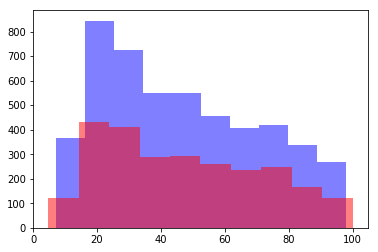

In [17]:
plt.hist(Train[new_dep_var], alpha=0.5, color='b')
plt.hist(Test[new_dep_var], alpha=0.5, color='r')
plt.show()

# Separate the Dependent and Independet Variables

In [18]:
# Train data
y_train = Train[new_dep_var].values
print y_train.shape

X_train = Train.drop([dependent_variable, new_dep_var], axis=1)
print X_train.shape

# Test data
y_test = Test[new_dep_var].values
print y_test.shape

X_test = Test.drop([dependent_variable, new_dep_var], axis=1)
print X_test.shape

(4918,)
(4918, 10)
(2572,)
(2572, 10)


In [19]:
for c in sorted(X_train.columns):
    print c

bathrooms_by_guests_included
bedrooms_by_beds
beds_by_guests_included
cleaning_fee_by_guests_included
days_delta
guests_included
host_acceptance_rate_by_host_response_rate
host_listings_count
host_response_rate
reviews_per_month


# Normalize the Training and Test Data

In [20]:
def normalize_df(df):
    return (df - df.min()) / (df.max() - df.min())

# X_train = (X_train - X_train.min()) / (X_train.max() - X_train.min())

X_train = normalize_df(X_train)
X_test = normalize_df(X_test)

# Scale the Dependent variables
We don't want any one variable dominating others in the regression model, so let's start by scaling the dependent variables. As with Imputation, we will train the scaler only on the training data (to learn the mean and standard deviation), and then use it as-is on the Test data. We will assume that all dependent variables are interval.

In [21]:
# Scale the data

from sklearn.preprocessing import QuantileTransformer

scaler = QuantileTransformer()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

0: 9.999999977795539e-08, 9.999999977795539e-08


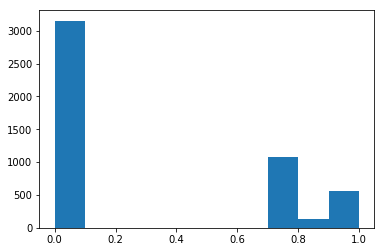

1: 9.999999977795539e-08, 9.999999977795539e-08


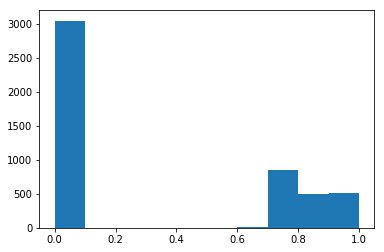

2: 9.999999977795539e-08, 9.999999977795539e-08


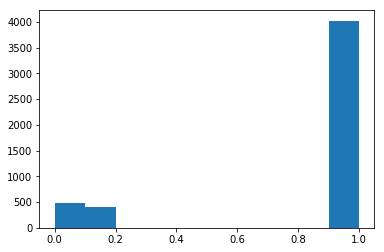

3: 9.999999977795539e-08, 9.999999977795539e-08


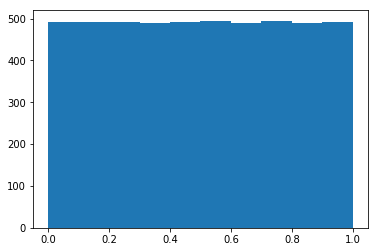

4: 9.999999977795539e-08, 9.999999977795539e-08


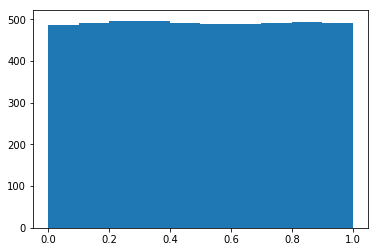

5: 9.999999977795539e-08, 9.999999977795539e-08


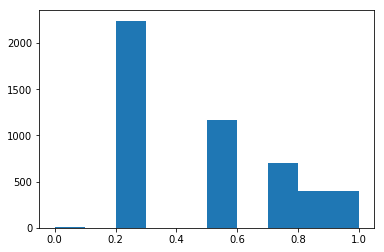

6: 9.999999977795539e-08, 9.999999977795539e-08


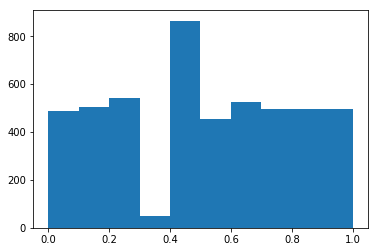

7: 9.999999977795539e-08, 9.999999977795539e-08


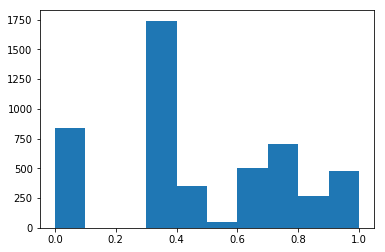

8: 9.999999977795539e-08, 9.999999977795539e-08


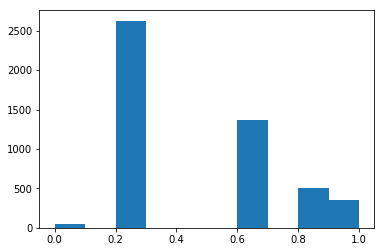

9: 9.999999977795539e-08, 9.999999977795539e-08


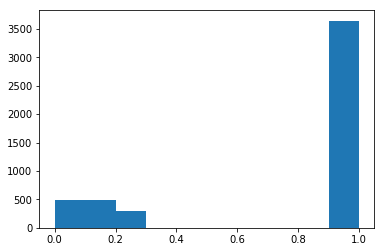

In [22]:
import matplotlib.pyplot as plt
for i in range(X_train.shape[1]):
    print '%s: %s, %s' % (i, np.min(X_train[:, i]), np.min(X_train[:, i]))
    plt.hist(X_train[:, i])
    plt.show()

# Try some transformations on the Independent Variables

exp


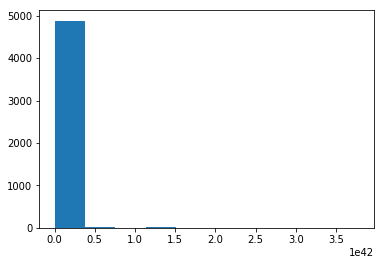

identity


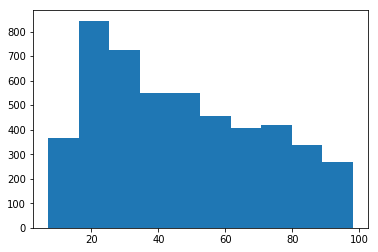

log


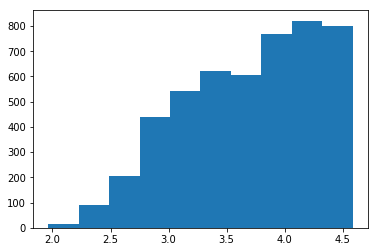

sqrt


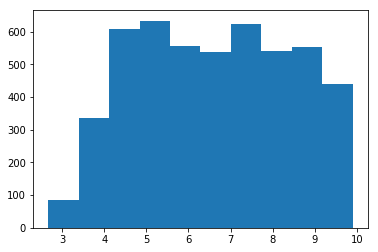

standard_scale


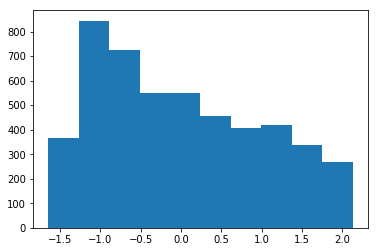

x^1/4


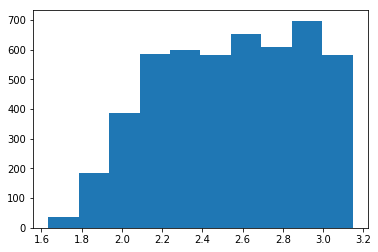

In [23]:
func_dict = {
    'identity': lambda x: x, 
    'sqrt': np.sqrt, 
    'log': np.log, 
    'exp': np.exp, 
    'x^1/4': lambda x: [i**(1./4) for i in x],
    'standard_scale': lambda x: [(i - np.mean(x)) / np.std(x) for i in x],
}

for k in sorted(func_dict.keys()):
    print k
    plt.hist(func_dict[k](y_train.ravel()))
    plt.show()


In [24]:
# Let's go with standard scaling for now

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler(copy=True, with_mean=True, with_std=True)
y_train = y_train.reshape(-1, 1)
scaler.fit(y_train)
y_train = scaler.transform(y_train)
y_train = y_train.ravel()
print y_train.shape

y_test = y_test.reshape(-1, 1)
y_test = scaler.transform(y_test)
y_test = y_test.ravel()
print y_test.shape

(4918,)
(2572,)


# Create a baseline model using Training Mean

Mean squared error: 1.01
Variance score: -0.00


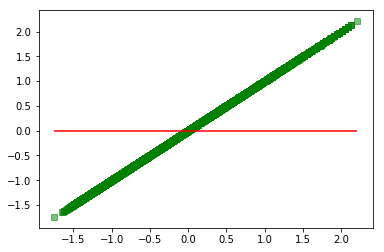

In [25]:
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, make_scorer, roc_auc_score


m_train = np.mean(y_train)
y_test_baseline_pred = np.array([m_train for i in range(y_test.shape[0])])


# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test.ravel(), y_test_baseline_pred.ravel()))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test.ravel(), y_test_baseline_pred.ravel()))

# Plot the residuals

plt.scatter(y_test, y_test-y_test_baseline_pred, c='g', marker='s', alpha=0.5)
plt.hlines(y=0, xmin=np.min(y_test), xmax=np.max(y_test), color='r')
plt.show()

# Create a baseline model using Training Median

Mean squared error: 1.04
Variance score: -0.03


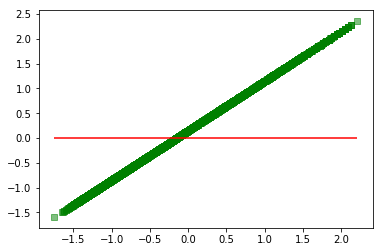

In [26]:
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, make_scorer, roc_auc_score


m_train = np.median(y_train)
y_test_baseline_pred = np.array([m_train for i in range(y_test.shape[0])])


# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test.ravel(), y_test_baseline_pred.ravel()))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test.ravel(), y_test_baseline_pred.ravel()))

# Plot the residuals

plt.scatter(y_test, y_test-y_test_baseline_pred, c='g', marker='s', alpha=0.5)
plt.hlines(y=0, xmin=np.min(y_test), xmax=np.max(y_test), color='r')
plt.show()

Mean squared error: 0.21
Variance score: 0.79
train residuals:


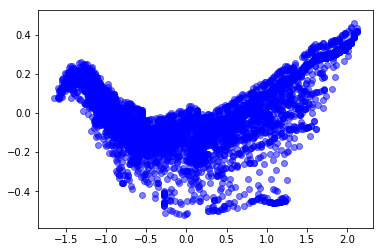

test residuals:


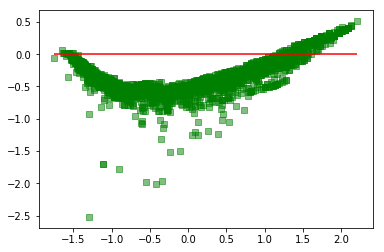

In [27]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model

# Create linear regression object
regr = linear_model.Lasso(alpha=0.001, fit_intercept=True, max_iter=10000)

# Train the model using the training sets
regr.fit(X_train, y_train)

y_train_pred = regr.predict(X_train)

# Make predictions using the testing set
y_pred = regr.predict(X_test)

# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test.ravel(), y_pred.ravel()))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test.ravel(), y_pred.ravel()))

# Plot the residuals
print 'train residuals:'
plt.scatter(y_train, y_train-y_train_pred, c='b', marker='o', alpha=0.5)
plt.show()

print 'test residuals:'
plt.scatter(y_test, y_test-y_pred, c='g', marker='s', alpha=0.5)
plt.hlines(y=0, xmin=np.min(y_test), xmax=np.max(y_test), color='r')
plt.show()

# Check for endogeneity

guests_included: correlation coef: -0.012415145169404129


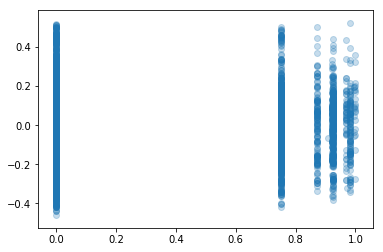

host_listings_count: correlation coef: 0.01432168373323054


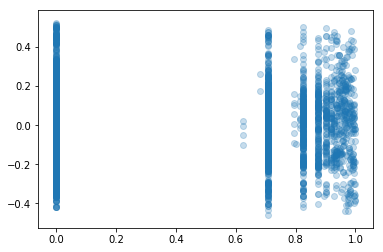

host_response_rate: correlation coef: -0.007926006042435917


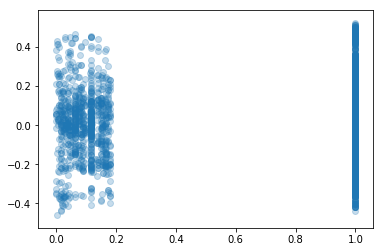

days_delta: correlation coef: -0.01974893485745453


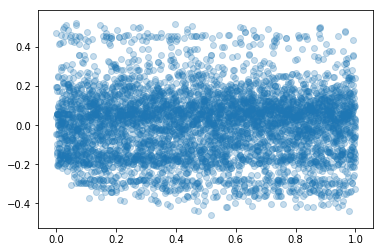

reviews_per_month: correlation coef: 0.019742841287165778


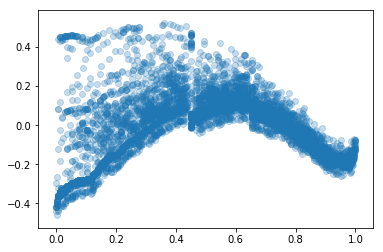

review_scores_rating: correlation coef: -0.01432938263226347


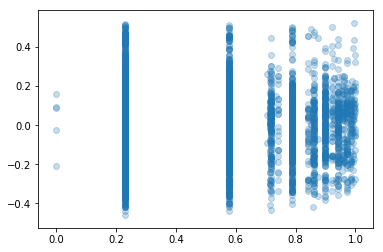

beds_by_guests_included: correlation coef: -0.010530403024257083


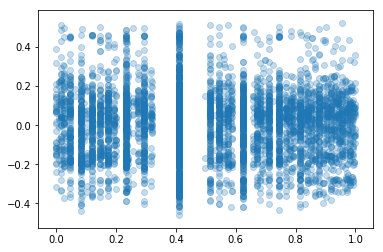

cleaning_fee_by_guests_included: correlation coef: -0.01010032144034061


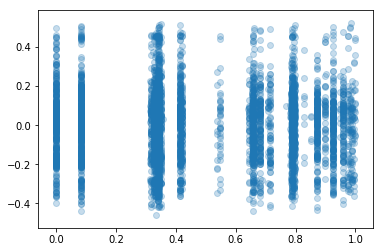

bedrooms_by_beds: correlation coef: -0.021715982070417215


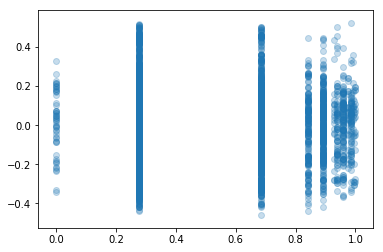

bathrooms_by_guests_included: correlation coef: -0.014871878815556027


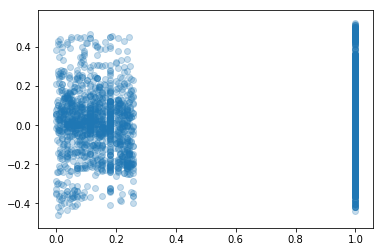

In [28]:
y_train_error = regr.predict(X_train) - y_train
for cname, c in zip(Train.columns, X_train.T):
    print '%s: correlation coef: %s' % (cname, np.corrcoef(c.ravel(), y_train_error.ravel())[1, 0])
    plt.scatter(c.ravel(), y_train_error.ravel(), alpha=0.25)
    plt.show()

In [29]:
from sklearn import model_selection

from sklearn.linear_model import LinearRegression, Ridge, ElasticNet
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor, RandomForestRegressor
from sklearn.svm import SVR


kfold = model_selection.KFold(n_splits=10, shuffle=True, random_state=1234)


def build_model(model_name):
    return model_name()

for model_name in [LinearRegression, Ridge, ElasticNet, \
                   AdaBoostRegressor, GradientBoostingRegressor, RandomForestRegressor]:
    
    model = build_model(model_name)
    results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring='neg_mean_squared_error')
    print model_name, results.mean()
    

<class 'sklearn.linear_model.base.LinearRegression'> -0.030853691895678236
<class 'sklearn.linear_model.ridge.Ridge'> -0.03086113000953155
<class 'sklearn.linear_model.coordinate_descent.ElasticNet'> -1.0000831069101586
<class 'sklearn.ensemble.weight_boosting.AdaBoostRegressor'> -0.025984725897309945
<class 'sklearn.ensemble.gradient_boosting.GradientBoostingRegressor'> -0.01589004295166971
<class 'sklearn.ensemble.forest.RandomForestRegressor'> -0.018032038698791577


Mean squared error: 0.15
r2 score: 0.85
explained variance score: 0.90


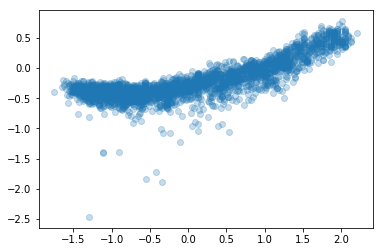

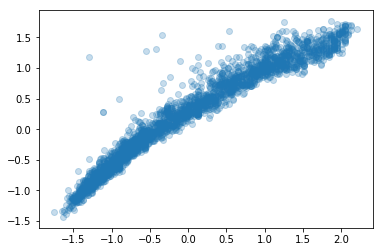

In [30]:
import xgboost
from sklearn.metrics import explained_variance_score

xgb = xgboost.XGBRegressor(n_estimators=100, learning_rate=0.05, gamma=0, 
                          subsample=0.5, colsample_bytree=0.5, max_depth=15, 
                          objective='reg:linear')

xgb.fit(X_train, y_train)

y_pred = xgb.predict(X_test)

# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))
# Explained variance score: 1 is perfect prediction
print('r2 score: %.2f' % r2_score(y_test.ravel(), y_pred.ravel(),))

# Explained variance score: 1 is perfect prediction
print('explained variance score: %.2f' % explained_variance_score(y_test.ravel(), y_pred.ravel()))   
plt.scatter(y_test.tolist(), (y_test-y_pred).tolist(), alpha=0.25)
plt.show()

plt.scatter(y_test, y_pred, alpha=0.25)
plt.show()

Mean squared error: 0.25
r2 score: 0.75
explained variance score: 0.79


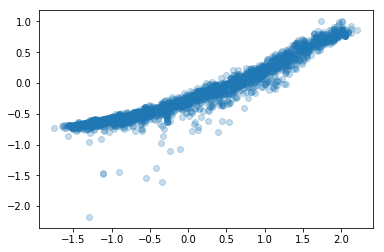

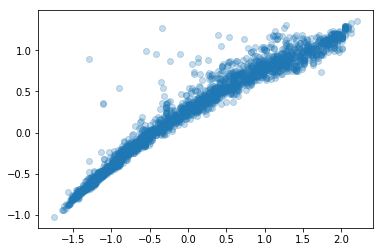

In [31]:
gb = GradientBoostingRegressor(n_estimators=100, learning_rate=0.01, subsample=0.75, max_depth=15)

gb.fit(X_train, y_train)

y_pred = gb.predict(X_test)

# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))
# Explained variance score: 1 is perfect prediction
print('r2 score: %.2f' % r2_score(y_test.ravel(), y_pred.ravel(),))

# Explained variance score: 1 is perfect prediction
print('explained variance score: %.2f' % explained_variance_score(y_test.ravel(), y_pred.ravel()))   
plt.scatter(y_test.tolist(), (y_test-y_pred).tolist(), alpha=0.25)
plt.show()

plt.scatter(y_test, y_pred, alpha=0.25)
plt.show()

# Grid Search over GradientBoostingRegressor

# Grid Search Done

# Stack some Models using StackingRegressor

## Create a model list first

In [32]:
lass = linear_model.Lasso(alpha=0.001, fit_intercept=False, 
                          max_iter=10000)

ridge = linear_model.Ridge(normalize=False, alpha=0.1, 
                           max_iter=10000)

gb = GradientBoostingRegressor(n_estimators=100, learning_rate=0.01, 
                               subsample=0.75, max_depth=15)

xgb = xgboost.XGBRegressor(n_estimators=100, learning_rate=0.05, 
                           gamma=0, subsample=0.5, colsample_bytree=0.5, 
                           max_depth=15, objective='reg:linear')

randf = RandomForestRegressor(n_estimators=100, min_samples_split=10)

svr_rbf = SVR(kernel='rbf')

## Let's try vecstack API

task:         [regression]
metric:       [rmse]
variant:      [A]
n_estimators: [5]

estimator  0: [lr: LinearRegression]
    fold  0:  [0.03202302]
    fold  1:  [0.02907550]
    fold  2:  [0.02967215]
    fold  3:  [0.03201219]
    fold  4:  [0.03231358]
    fold  5:  [0.03334759]
    fold  6:  [0.02969993]
    fold  7:  [0.02700679]
    fold  8:  [0.03224641]
    fold  9:  [0.03143920]
    ----
    MEAN:     [0.03088363] + [0.00184449]

estimator  1: [lass: Lasso]
    fold  0:  [0.13870206]
    fold  1:  [0.14363720]
    fold  2:  [0.16232420]
    fold  3:  [0.13609701]
    fold  4:  [0.14139279]
    fold  5:  [0.15293672]
    fold  6:  [0.14549429]
    fold  7:  [0.14190330]
    fold  8:  [0.11667410]
    fold  9:  [0.14980351]
    ----
    MEAN:     [0.14289652] + [0.01134872]

estimator  2: [ridge: Ridge]
    fold  0:  [0.03202300]
    fold  1:  [0.02907549]
    fold  2:  [0.02967224]
    fold  3:  [0.03201215]
    fold  4:  [0.03231356]
    fold  5:  [0.03334765]
    fold  6:  [

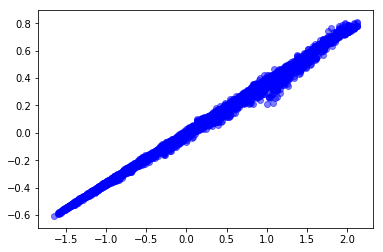

test residuals:


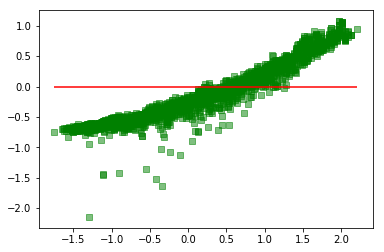

In [33]:
from vecstack import StackingTransformer
from vecstack import stacking
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.linear_model import LinearRegression, Ridge, ElasticNet
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor, RandomForestRegressor
from sklearn.svm import SVR

def rmse(train, pred):
    return mean_squared_error(train, pred)


def rsq(train, pred):
    return r2_score(train, pred)

lr = linear_model.LinearRegression()

lass = linear_model.Lasso(alpha=0.001, fit_intercept=False, 
                          max_iter=10000)

ridge = linear_model.Ridge(normalize=False, alpha=0.001, 
                           max_iter=10000)

gb = GradientBoostingRegressor(n_estimators=100, learning_rate=0.01, 
                               subsample=0.75, max_depth=15)

xgb = xgboost.XGBRegressor(n_estimators=100, learning_rate=0.05, 
                           gamma=0, subsample=0.5, colsample_bytree=0.5, 
                           max_depth=15, objective='reg:linear')

randf = RandomForestRegressor(n_estimators=100, min_samples_split=10)

svr_rbf = SVR(kernel='rbf')


estimators = [('lr', lr), 
              ('lass', lass), 
              ('ridge', ridge),
              ('gbf', GradientBoostingRegressor(alpha=0.001)), 
              # ('abr', AdaBoostRegressor(learning_rate=0.001)),
              # ('xgb', xgb), 
              ('randf', randf), 
             ]

stack = StackingTransformer(estimators, regression=True, 
                            shuffle=True, n_folds=10, 
                            metric=rmse, verbose=2, 
                           )

stack = stack.fit(X_train, y_train)

# Get stacked features
S_train = stack.transform(X_train)
S_test = stack.transform(X_test)

# Use 2nd level estimator on Stacked data
# model = RandomForestRegressor(n_estimators=100, min_impurity_decrease=0.05)
model = gb

model.fit(S_train, y_train)

y_train_pred = model.predict(S_train)

# Make predictions using the testing set
y_pred = model.predict(S_test)

# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test.ravel(), y_pred.ravel()))
# Explained variance score: 1 is perfect prediction
print 'Variance score: %.2f' % r2_score(y_test.ravel(), y_pred.ravel()) 

# Plot the residuals
print 'train residuals:'
plt.scatter(y_train, y_train-y_train_pred, c='b', marker='o', alpha=0.5)
plt.show()

print 'test residuals:'
plt.scatter(y_test, y_test-y_pred, c='g', marker='s', alpha=0.5)
plt.hlines(y=0, xmin=np.min(y_test), xmax=np.max(y_test), color='r')
plt.show()

task:         [regression]
metric:       [rmse]
mode:         [oof_pred]
n_models:     [4]

model  0:     [GradientBoostingRegressor]
    fold  0:  [0.01511927]
    fold  1:  [0.01615015]
    fold  2:  [0.01648244]
    fold  3:  [0.01588411]
    fold  4:  [0.01458350]
    fold  5:  [0.01101562]
    fold  6:  [0.01489230]
    fold  7:  [0.01924353]
    fold  8:  [0.01984334]
    fold  9:  [0.01671750]
    ----
    MEAN:     [0.01599317] + [0.00234367]
    FULL:     [0.01599224]

    Fitting on full train set...

model  1:     [ExtraTreesRegressor]
    fold  0:  [0.03411315]
    fold  1:  [0.03170922]
    fold  2:  [0.03798053]
    fold  3:  [0.03088185]
    fold  4:  [0.03576303]
    fold  5:  [0.03125274]
    fold  6:  [0.03148556]
    fold  7:  [0.03277367]
    fold  8:  [0.03540370]
    fold  9:  [0.03614209]
    ----
    MEAN:     [0.03375055] + [0.00235046]
    FULL:     [0.03374973]

    Fitting on full train set...

model  2:     [XGBRegressor]
    fold  0:  [0.06976648]
    fold

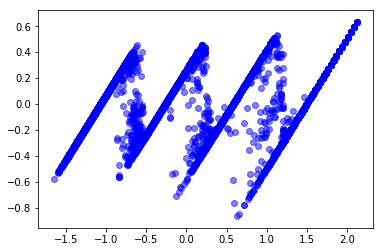

test residuals:


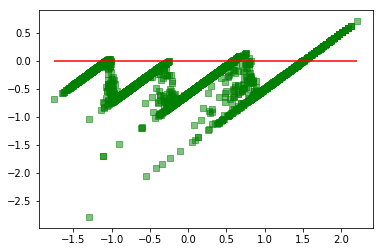

In [34]:
from sklearn.ensemble import ExtraTreesRegressor



estimators = [GradientBoostingRegressor(alpha=0.001), 
              # AdaBoostRegressor(learning_rate=0.001), 
              ExtraTreesRegressor(random_state = 0, n_jobs = -1, n_estimators = 100, max_depth = 3), 
              xgb, randf]


S_train, S_test = stacking(estimators, X_train, y_train, X_test, 
                           regression=True, n_folds=10, 
                           metric=rmse, 
                           mode='oof_pred', 
                           random_state=1234, 
                           verbose=2)

# Use 2nd level estimator on Stacked data
model = RandomForestRegressor(n_estimators=100, min_impurity_decrease=0.05)

model.fit(S_train, y_train)

y_train_pred = model.predict(S_train)

# Make predictions using the testing set
y_pred = model.predict(S_test)


# Train mean squared error
print 'Train data:'
print("Mean squared error: %.2f"
      % mean_squared_error(y_train.ravel(), y_train_pred.ravel()))
# Train explained variance score: 1 is perfect prediction
print 'Variance score: %.2f' % r2_score(y_train.ravel(), y_train_pred.ravel()) 

# Test mean squared error
print 'Test data'
print("Mean squared error: %.2f"
      % mean_squared_error(y_test.ravel(), y_pred.ravel()))
# Test explained variance score: 1 is perfect prediction
print 'Variance score: %.2f' % r2_score(y_test.ravel(), y_pred.ravel())

# Plot the residuals
print 'train residuals:'
plt.scatter(y_train, y_train-y_train_pred, c='b', marker='o', alpha=0.5)
plt.show()

print 'test residuals:'
plt.scatter(y_test, y_test-y_pred, c='g', marker='s', alpha=0.5)
plt.hlines(y=0, xmin=np.min(y_test), xmax=np.max(y_test), color='r')
plt.show()

# Try Blending

In [35]:
from sklearn.ensemble import ExtraTreesRegressor


estimators = [GradientBoostingRegressor(alpha=0.001), 
              AdaBoostRegressor(learning_rate=0.001), 
              ExtraTreesRegressor(random_state = 0, n_jobs = -1, n_estimators = 100, max_depth = 3), 
              xgb, randf]


S_train, S_test = stacking(estimators, X_train, y_train, X_test, 
                          regression=True, n_folds=5, metric=rmse, 
                          mode='oof_pred', 
                          random_state=1234, 
                          verbose=2)

task:         [regression]
metric:       [rmse]
mode:         [oof_pred]
n_models:     [5]

model  0:     [GradientBoostingRegressor]
    fold  0:  [0.01588456]
    fold  1:  [0.01646347]
    fold  2:  [0.01272361]
    fold  3:  [0.01704406]
    fold  4:  [0.01782733]
    ----
    MEAN:     [0.01598861] + [0.00175450]
    FULL:     [0.01598802]

    Fitting on full train set...

model  1:     [AdaBoostRegressor]
    fold  0:  [0.02930109]
    fold  1:  [0.03157284]
    fold  2:  [0.02901860]
    fold  3:  [0.03066751]
    fold  4:  [0.03403806]
    ----
    MEAN:     [0.03091962] + [0.00181375]
    FULL:     [0.03091904]

    Fitting on full train set...

model  2:     [ExtraTreesRegressor]
    fold  0:  [0.03282228]
    fold  1:  [0.03476071]
    fold  2:  [0.03375971]
    fold  3:  [0.03190775]
    fold  4:  [0.03625442]
    ----
    MEAN:     [0.03390097] + [0.00151224]
    FULL:     [0.03390090]

    Fitting on full train set...

model  3:     [XGBRegressor]
    fold  0:  [0.064416

In [36]:
final_prediction = np.mean(S_test, axis=1)

# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test.ravel(), final_prediction.ravel()))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test.ravel(), final_prediction.ravel()))

Mean squared error: 0.16
Variance score: 0.85


Mean squared error: 0.21
Variance score: 0.79
train residuals:


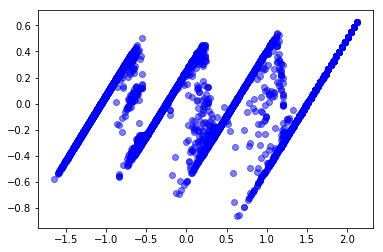

test residuals:


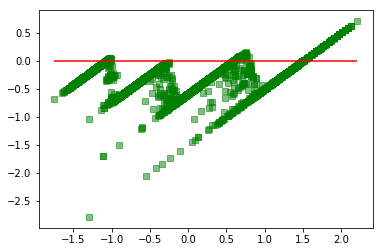

In [37]:
# Use 2nd level estimator on Stacked data
model = RandomForestRegressor(n_estimators=100, min_impurity_decrease=0.05)

model.fit(S_train, y_train)

y_train_pred = model.predict(S_train)

# Make predictions using the testing set
y_pred = model.predict(S_test)

# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test.ravel(), y_pred.ravel()))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test.ravel(), y_pred.ravel()))

# Plot the residuals
print 'train residuals:'
plt.scatter(y_train, y_train-y_train_pred, c='b', marker='o', alpha=0.5)
plt.show()

print 'test residuals:'
plt.scatter(y_test, y_test-y_pred, c='g', marker='s', alpha=0.5)
plt.hlines(y=0, xmin=np.min(y_test), xmax=np.max(y_test), color='r')
plt.show()

# Try Keras